In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_excel ('C:/Users/Otmilda/Downloads/mui_arusbalik.xlsx')
data.head()

,web-scraper-order,web-scraper-start-url,judul,headline,kategori
0,1652026627-17,https://www.liputan6.com/tag/arus-balik,Pemudik Arus Balik di Pelabuhan Gilimanuk dan ...,Masih ada pemudik arus balik Lebaran di Pelabu...,Health Info
1,1652026627-6,https://www.liputan6.com/tag/arus-balik,Polisi Sebut Arus Balik Lewat Jalur Nagreg Ter...,Arus balik di kawasan tersebut bisa melaju lan...,Peristiwa
2,1652026627-4,https://www.liputan6.com/tag/arus-balik,Jumlah Penerbangan Internasional di Bandara So...,"Hingga H+5 pasca lebaran, Jumlah Penerbangan d...",Ekonomi
3,1652026627-10,https://www.liputan6.com/tag/arus-balik,"Arus Balik Lebaran, 3.500 Penumpang Tiba di Te...",Menteri Perhubungan (Menhub) Budi Karya Sumadi...,Ekonomi
4,1652026627-14,https://www.liputan6.com/tag/arus-balik,Volume Kendaraan Gerbang Tol Cikunir 6 Naik 10...,Terjadi peningkatan volume transaksi arus bali...,Ekonomi


In [2]:
data['headline']

0      Masih ada pemudik arus balik Lebaran di Pelabu...
1      Arus balik di kawasan tersebut bisa melaju lan...
2      Hingga H+5 pasca lebaran, Jumlah Penerbangan d...
3      Menteri Perhubungan (Menhub) Budi Karya Sumadi...
4      Terjadi peningkatan volume transaksi arus bali...
                             ...                        
179    Rekayasa lalu lintas yang diberlakukan di arus...
180    Dinas Perhubungan Jawa Barat mengerahkan 5.000...
181    Presiden Joko Widodo atau Jokowi mengatakan pu...
182    Korps Lalu Lintas (Korlantas) Polri memprediks...
183    Budi Karya mengatakan, dua titik krusial yang ...
Name: headline, Length: 184, dtype: object

In [3]:
#lower Casing
data['headline'] = data ['headline'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['headline'].head()

0    masih ada pemudik arus balik lebaran di pelabu...
1    arus balik di kawasan tersebut bisa melaju lan...
2    hingga h+5 pasca lebaran, jumlah penerbangan d...
3    menteri perhubungan (menhub) budi karya sumadi...
4    terjadi peningkatan volume transaksi arus bali...
Name: headline, dtype: object

In [4]:
#remove punctuation
data['headline'] = data ['headline'].str.replace('[^\w\s]',' ')
data['headline'].head()

C:\Users\Otmilda\AppData\Local\Temp/ipykernel_9708/2234100890.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headline'] = data ['headline'].str.replace('[^\w\s]',' ')


0    masih ada pemudik arus balik lebaran di pelabu...
1    arus balik di kawasan tersebut bisa melaju lan...
2    hingga h 5 pasca lebaran  jumlah penerbangan d...
3    menteri perhubungan  menhub  budi karya sumadi...
4    terjadi peningkatan volume transaksi arus bali...
Name: headline, dtype: object

In [13]:
#remove angka
data['headline'] = data ['headline'].str.replace(r'[\d+]','')
data['headline']

C:\Users\Otmilda\AppData\Local\Temp/ipykernel_14856/1519234374.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headline'] = data ['headline'].str.replace(r'[\d+]','')


0      masih ada pemudik arus balik lebaran di pelabu...
1      arus balik di kawasan tersebut bisa melaju lan...
2      hingga h  pasca lebaran  jumlah penerbangan di...
3      menteri perhubungan  menhub  budi karya sumadi...
4      terjadi peningkatan volume transaksi arus bali...
                             ...                        
179    rekayasa lalu lintas yang diberlakukan di arus...
180    dinas perhubungan jawa barat mengerahkan   pet...
181    presiden joko widodo atau jokowi mengatakan pu...
182    korps lalu lintas  korlantas  polri memprediks...
183    budi karya mengatakan  dua titik krusial yang ...
Name: headline, Length: 184, dtype: object

In [5]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter ('removepunct_liputan6.xlsx',engine='xlsxwriter')
data['headline'].to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [6]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [7]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()


#kalimat
data['headline'] = data['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
data['headline'].head()

0    pemudik arus balik lebaran pelabuhan gilimanuk...
1    arus balik kawasan tersebut melaju lancar adan...
2    hingga h 5 pasca lebaran jumlah penerbangan ba...
3    menteri perhubungan menhub budi karya sumadi m...
4    terjadi peningkatan volume transaksi arus bali...
Name: headline, dtype: object

In [8]:
stopword

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [9]:
#Import Stopword Factory Class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#create factory
factory = StopWordRemoverFactory()
more_stopword = ['abc','h']


#Tambahkan stopword baru
stopwordplus = factory.get_stop_words()+stopwords()+more_stopword

data['headline'] = data['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordplus))
data['headline'].head()

TypeError: 'list' object is not callable

In [20]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter ('printstopwords_liputan.xlsx',engine='xlsxwriter')
data['headline'].to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [21]:
text =data['headline']
text_list = [i.split() for i in text]

In [22]:
print(len(text_list))

184


In [23]:
print(text_list)

[['pemudik', 'arus', 'balik', 'lebaran', 'pelabuhan', 'gilimanuk', 'merak', 'abai', 'masker'], ['arus', 'balik', 'kawasan', 'tersebut', 'melaju', 'lancar', 'adanya', 'sejumlah', 'rekayasa', 'lalu', 'lintas', 'dilakukan', 'pihak', 'kepolisian', 'sepanjang', 'jalur', 'selatan'], ['hingga', 'h', 'pasca', 'lebaran', 'jumlah', 'penerbangan', 'bandara', 'soekarno', 'hatta', 'alami', 'kenaikan'], ['menteri', 'perhubungan', 'menhub', 'budi', 'karya', 'sumadi', 'melakukan', 'kunjungan', 'kerja', 'terminal', 'bandara', 'soekarno', 'hatta', 'meninjau', 'arus', 'balik', 'idul', 'fitri', 'tahun'], ['terjadi', 'peningkatan', 'volume', 'transaksi', 'arus', 'balik', 'melalui', 'gerbang', 'tol', 'gt', 'cileunyi', 'ruas', 'tol', 'padaleunyi', 'gt', 'cikunir', 'ruas', 'tol', 'jorr', 'e'], ['sepertiga', 'pemudik', 'pulang', 'jakarta', 'puncak', 'arus', 'balik', 'lebaran'], ['rekor', 'arus', 'balik', 'tertinggi', 'sepanjang', 'sejarah', 'jalan', 'tol', 'indonesia', 'terjadi', 'hari', 'sabtu', 'mei', 'h', '

In [24]:
import re

def tokenize (text):
    tokens = re.split('\W+', text)
    return tokens

data['headline'] = data['headline'].apply(lambda x: tokenize(x.lower()))
data.head()

,web-scraper-order,web-scraper-start-url,judul,headline,kategori
0,1652026627-17,https://www.liputan6.com/tag/arus-balik,Pemudik Arus Balik di Pelabuhan Gilimanuk dan ...,"[pemudik, arus, balik, lebaran, pelabuhan, gil...",Health Info
1,1652026627-6,https://www.liputan6.com/tag/arus-balik,Polisi Sebut Arus Balik Lewat Jalur Nagreg Ter...,"[arus, balik, kawasan, tersebut, melaju, lanca...",Peristiwa
2,1652026627-4,https://www.liputan6.com/tag/arus-balik,Jumlah Penerbangan Internasional di Bandara So...,"[hingga, h, pasca, lebaran, jumlah, penerbanga...",Ekonomi
3,1652026627-10,https://www.liputan6.com/tag/arus-balik,"Arus Balik Lebaran, 3.500 Penumpang Tiba di Te...","[menteri, perhubungan, menhub, budi, karya, su...",Ekonomi
4,1652026627-14,https://www.liputan6.com/tag/arus-balik,Volume Kendaraan Gerbang Tol Cikunir 6 Naik 10...,"[terjadi, peningkatan, volume, transaksi, arus...",Ekonomi


In [25]:
data.to_csv("mui_liputan.csv", sep=',')
import pandas as pd
data = pd.read_csv('mui_liputan.csv')
data.head()

,Unnamed: 0,web-scraper-order,web-scraper-start-url,judul,headline,kategori
0,0,1652026627-17,https://www.liputan6.com/tag/arus-balik,Pemudik Arus Balik di Pelabuhan Gilimanuk dan ...,"['pemudik', 'arus', 'balik', 'lebaran', 'pelab...",Health Info
1,1,1652026627-6,https://www.liputan6.com/tag/arus-balik,Polisi Sebut Arus Balik Lewat Jalur Nagreg Ter...,"['arus', 'balik', 'kawasan', 'tersebut', 'mela...",Peristiwa
2,2,1652026627-4,https://www.liputan6.com/tag/arus-balik,Jumlah Penerbangan Internasional di Bandara So...,"['hingga', 'h', 'pasca', 'lebaran', 'jumlah', ...",Ekonomi
3,3,1652026627-10,https://www.liputan6.com/tag/arus-balik,"Arus Balik Lebaran, 3.500 Penumpang Tiba di Te...","['menteri', 'perhubungan', 'menhub', 'budi', '...",Ekonomi
4,4,1652026627-14,https://www.liputan6.com/tag/arus-balik,Volume Kendaraan Gerbang Tol Cikunir 6 Naik 10...,"['terjadi', 'peningkatan', 'volume', 'transaks...",Ekonomi


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1)
tf = tf_vectorizer.fit_transform(data.headline).toarray()

In [27]:
tf_2 = pd.DataFrame (tf)
tf_2

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,803,804,805,806,807,808
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
tf_terms = tf_vectorizer.get_feature_names()
tf_3 = pd.DataFrame(tf, columns=tf_terms)
tf_3

,abai,abc,adanya,adi,aircraft,akhir,akhmad,akibat,akses,aksi,...,warga,way,wfh,wib,widodo,wilayah,yogo,yulza,yusep,zayed
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter ('tf_liputan.xlsx',engine='xlsxwriter')
data['headline'].to_excel(saveresult, index=False, sheet_name='report')
saveresult.save()

In [30]:
from gensim.models import Phrases
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram [text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

In [31]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np
from numpy import array
dictionary = corpora.Dictionary(text_list)

dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary<144 unique tokens: ['merak', 'pelabuhan', 'pemudik', 'adanya', 'dilakukan']...>


In [32]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
print(len(doc_term_matrix))
print(doc_term_matrix[100])

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(doc_term_matrix))
print(doc_term_matrix[:1])

184
[(9, 1), (31, 1), (32, 1), (38, 2), (41, 1), (42, 2), (43, 1), (56, 1), (57, 1), (64, 1), (65, 2), (68, 1), (73, 1), (83, 1), (98, 1), (99, 1), (100, 1), (103, 2), (113, 1), (131, 1)]
Number of unique tokens: 144
Number of documents: 184
[[(0, 1), (1, 1), (2, 1)]]


In [33]:
from gensim.models.ldamodel import LdaModel
def compute_coherence_values(dictionary, corpus, texts, limit, coherence='c_v', start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [34]:
start, step, limit = 1, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 10 # hati-hati sangat LAMBAT karena cross validation pada metode yang memang tidak efisien (LDA)

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    model_list, c = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text_list, start=start, limit=limit, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
'Done'

iterasi ke:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

'Done'

C:\Users\Otmilda\AppData\Local\Temp/ipykernel_14856/1911352540.py:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002947DF66430> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(("coherence_values"), loc='best')


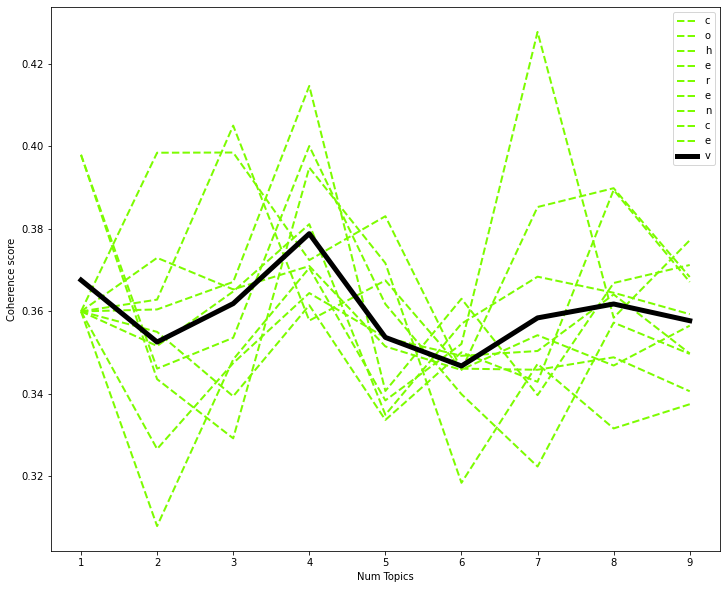

In [35]:
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
for m, cv in zip (x, c):
    print ("Num Topics=",m, "has Coherence value of", round(cv, 4))

Num Topics= 1 has Coherence value of 0.3599
Num Topics= 2 has Coherence value of 0.3984
Num Topics= 3 has Coherence value of 0.3985
Num Topics= 4 has Coherence value of 0.3724
Num Topics= 5 has Coherence value of 0.383
Num Topics= 6 has Coherence value of 0.3458
Num Topics= 7 has Coherence value of 0.3542
Num Topics= 8 has Coherence value of 0.3468
Num Topics= 9 has Coherence value of 0.3565


In [37]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 3 # Misal tidak di optimalkan terlebih dahulu
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=3, random_state=0)

In [39]:
from pprint import pprint
model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, random_state=4,num_topics=3)
pprint(model.print_topics())

[(0,
  '0.058*"jalan_tol" + 0.030*"arah" + 0.029*"jakarta" + 0.029*"one_way" + '
  '0.027*"jasa_marga" + 0.027*"lalu_lintas" + 0.023*"lintas" + 0.020*"lalu" + '
  '0.019*"jalan" + 0.017*"km"'),
 (1,
  '0.060*"puncak_arus" + 0.046*"kereta_api" + 0.030*"mei" + 0.025*"puncak" + '
  '0.025*"kereta" + 0.024*"hingga" + 0.023*"api" + 0.022*"terjadi" + '
  '0.020*"penumpang" + 0.019*"balik_lebaran"'),
 (2,
  '0.040*"one_way" + 0.037*"rekayasa_lalu" + 0.034*"lalu" + 0.032*"mudik" + '
  '0.031*"lintas" + 0.031*"budi_karya" + 0.028*"lalu_lintas" + 0.020*"one" + '
  '0.020*"way" + 0.019*"rekayasa"')]


In [40]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics
# Ukuran kolom = #Topics ==> Dimension Reduction
# Mengapa tidak dibagi Train & Test???

(184, 3)


array([[0.03696606, 0.92899232, 0.03404163],
       [0.01920575, 0.02026277, 0.96053147],
       [0.42975873, 0.53874097, 0.0315003 ],
       [0.26359246, 0.71931987, 0.01708766],
       [0.01711409, 0.01855312, 0.9643328 ],
       [0.04035243, 0.88128663, 0.07836094],
       [0.02042617, 0.77826535, 0.20130847],
       [0.01972588, 0.96114679, 0.01912733],
       [0.0224594 , 0.02278276, 0.95475784],
       [0.02915559, 0.94221757, 0.02862684],
       [0.01556885, 0.27057668, 0.71385447],
       [0.02253275, 0.95414081, 0.02332644],
       [0.46822103, 0.02037832, 0.51140064],
       [0.02046868, 0.95965439, 0.01987692],
       [0.01730345, 0.9635592 , 0.01913735],
       [0.02254127, 0.9533768 , 0.02408193],
       [0.03761539, 0.92436799, 0.03801662],
       [0.94901567, 0.02636962, 0.0246147 ],
       [0.02593899, 0.94990729, 0.02415372],
       [0.60187067, 0.02860481, 0.36952452],
       [0.93214926, 0.03412201, 0.03372874],
       [0.01889644, 0.96205382, 0.01904974],
       [0.

In [41]:
from tqdm import tqdm
# "Seandainya" diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

100%|█████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 22586.32it/s]


[2, 3, 2, 2, 3, 2, 2, 2, 3, 2]

C:\Users\Otmilda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


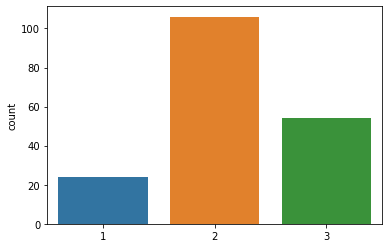

In [42]:
# mari kita plot
import seaborn as sns
plot = sns.countplot(doc_topic)

In [43]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [44]:
# Mari kita coba maknai masing-masing topic ini
Top_Words = 15
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 3 Topics, with top 15 Words:
Topic #1:
arus balik terminal mudik stasiun rest area meninjau sabtu mulai jakarta pemudik tiba data lebaran
Topic #2:
arus balik lebaran mei mudik puncak hari terjadi penumpang kereta api pelabuhan pt sebanyak lalu
Topic #3:
tol arah way one jakarta lintas lalu arus jalan balik km rekayasa cikampek hingga ruas


In [45]:
import gensim 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

data = gensimvis.prepare(model, doc_term_matrix, dictionary)
print(data)

pyLDAvis.save_html(data, 'ldamui.html')

C:\Users\Otmilda\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.109550  0.017918       1        1  37.693909
0      0.024609 -0.057760       2        1  31.731961
2      0.084941  0.039843       3        1  30.574130, topic_info=              Term       Freq      Total Category  logprob  loglift
93      kereta_api  34.000000  34.000000  Default  30.0000  30.0000
47       jalan_tol  46.000000  46.000000  Default  29.0000  29.0000
42     puncak_arus  51.000000  51.000000  Default  28.0000  28.0000
19      budi_karya  19.000000  19.000000  Default  27.0000  27.0000
10   rekayasa_lalu  30.000000  30.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
47       jalan_tol   9.538213  46.258149   Topic3  -4.0580  -0.3939
111          mulai   5.875814  18.474546   Topic3  -4.5425   0.0395
48             mei   6.471396  34.039405   Topic3  -4.4459  -0.4751
79     

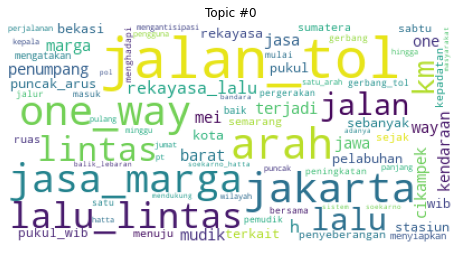

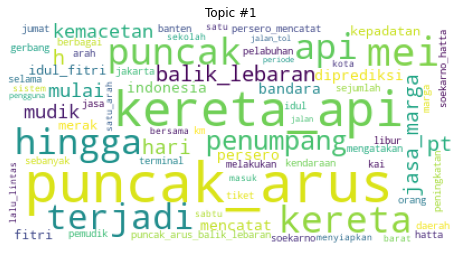

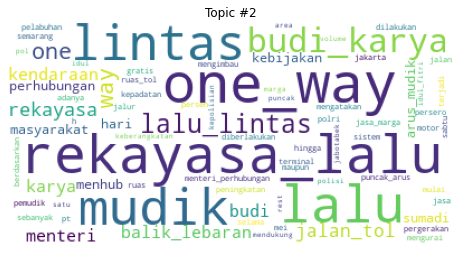

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(8,10))
    plt.imshow(wd(background_color="white",max_font_size=50,min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png",facecolor='k',bbox_inches='tight')

plt.show()